In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime 
from datetime import datetime as dt
os.chdir(r"C:\Users\itsfe\Downloads\Python Foundation Case Study 2 - Credit Card Case Study")
Cust_acq=pd.read_csv('Customer Acqusition.csv')
Spend=pd.read_csv('Spend.csv')
Repay=pd.read_csv('Repayment.csv')
Credit_data=pd.read_excel('Credit Card Data.xlsx')

## 1. In the above dataset,
## a. In case age is less than 18, replace it with mean of age values.

In [2]:
Cust_acq.Age=np.where(Cust_acq.Age<18,Cust_acq.Age.mean(),Cust_acq.Age)
Cust_acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
## (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [3]:
join=pd.merge(how='inner',left=Spend,right=Cust_acq,left_on='Customer',right_on='Customer')
join.Amount=np.where(join.Amount>join.Limit,.5*join.Limit,join.Amount)


## c. Incase the repayment amount is more than the limit, replace the repayment with the limit.


In [4]:
join1=pd.merge(how='inner',left=Repay,right=Cust_acq,left_on='Customer',right_on='Customer')
join1.Amount=np.where(join1.Amount>join1.Limit,join1.Limit,join1.Amount)


## 2. From the above dataset create the following summaries:
## a. How many distinct customers exist?

In [5]:
(~Cust_acq.Customer.duplicated()).sum()

100

# b. How many distinct categories exist?

In [6]:
(~Cust_acq.Segment.duplicated()).sum()

5

## c. What is the average monthly spend by customers?

In [7]:
Spend.Month=Spend.Month.astype('datetime64')
Spend['Month1']=Spend['Month'].dt.month
pd.pivot_table(data=Spend,values='Amount',index=['Customer','Month1'],aggfunc='mean')


Amount
Customer Month1               
A1       1       372762.587143
         2       175235.690000
         4       261649.250000
         5       361141.310000
         8       344372.100000
...                        ...
A95      1       240401.500000
A96      1        54729.660000
A97      1       139018.260000
A98      1       284521.060000
A99      1        90184.220000

[578 rows x 1 columns]

# d. What is the average monthly repayment by customers?

In [8]:
Repay.Month=Repay.Month.astype('datetime64')
Repay['Month2']=Repay.Month.dt.month
pd.pivot_table(data=Repay,values='Amount',index=['Customer','Month2'],aggfunc='mean')


Amount
Customer Month2               
A1       1.0     343972.327143
         2.0     156374.760000
         4.0     254474.580000
         7.0     297176.740000
         9.0     186427.500000
...                        ...
A95      1.0     369405.960000
A96      1.0     310992.300000
A97      1.0     121874.900000
A98      1.0     337815.570000
A99      1.0      25682.730000

[558 rows x 1 columns]

## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
## (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
## – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [9]:
sp_re=pd.merge(how='inner',left=Spend,right=Repay,left_on='Customer',right_on='Customer')
table=pd.pivot_table(data=sp_re,values=['Amount_x','Amount_y'],index=['Month1'],aggfunc='sum')
table['Profit']=table.Amount_y-table.Amount_x
tab_prof=table[table.Profit>0]
tab_prof['Interest']=tab_prof.Profit*0.029
tab_prof

C:\Users\itsfe\AppData\Local\Temp\ipykernel_21564\2865971608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab_prof['Interest']=tab_prof.Profit*0.029


,Amount_x,Amount_y,Profit,Interest
Month1,,,,
2,1.363412e+09,1.451522e+09,88110652.85,2.555209e+06
3,1.363808e+09,1.373256e+09,9448897.00,2.740180e+05
4,9.090117e+08,9.488581e+08,39846449.70,1.155547e+06
5,1.272817e+09,1.310234e+09,37416584.84,1.085081e+06
6,3.880553e+08,4.063657e+08,18310380.32,5.310010e+05
8,2.632131e+08,2.749142e+08,11701099.63,3.393319e+05
9,2.430704e+08,2.715815e+08,28511150.25,8.268234e+05
10,1.537719e+08,1.813678e+08,27595887.64,8.002807e+05
12,1.307270e+08,1.652582e+08,34531130.99,1.001403e+06


## f. What are the top 5 product types?

In [10]:
p_types=pd.pivot_table(data=Spend,values='Amount',index='Type',aggfunc='sum')
p_types=p_types.sort_values(by='Amount',ascending=False)
p_types.head(5)

,Amount
Type,
PETRO,49863174.09
CAMERA,41481571.96
FOOD,37773338.43
TRAIN TICKET,33067077.15
AIR TICKET,32955445.42


## g. Which city is having maximum spend?

In [11]:
tab=pd.merge(how='inner',left=Cust_acq,right=Spend,left_on='Customer',right_on='Customer')
spendtab=pd.pivot_table(data=tab,values='Amount',index='City',aggfunc='sum')
spendtab=spendtab.sort_values(by='Amount',ascending=False)
spendtab.head(1)

,Amount
City,
COCHIN,73495349.26


## h. Which age group is spending more money?

In [12]:
spend_cust=pd.merge(how='inner',left=Cust_acq,right=Spend,left_on='Customer',right_on='Customer')
spend_cust['Age group']=np.where((spend_cust.Age>=60),'Senior',np.where((spend_cust.Age>=31) ,'Adult','Youth'))
spend_cust.groupby(by='Age group')[['Amount']].sum().sort_values(by='Amount',ascending=False).head(1)

,Amount
Age group,
Adult,1.976996e+08


## i. Who are the top 10 customers in terms of repayment?

In [13]:
Repay.groupby(by='Customer')[['Amount']].sum().sort_values(by='Amount',ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

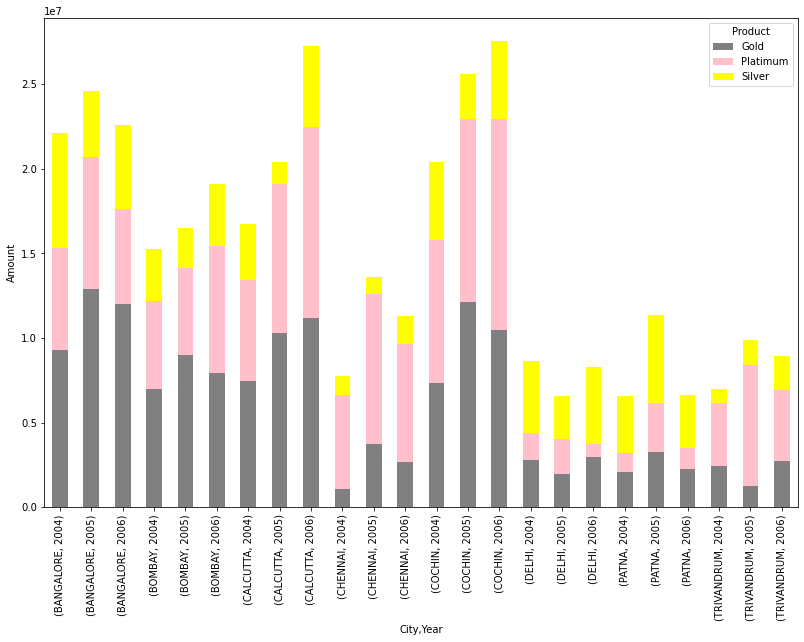

In [14]:
credit_spend=pd.merge(how='inner',left=Credit_data,right=Spend,left_on='Customer',right_on='Customer')
credit_spend['Year']=credit_spend.Month.dt.year
spend_city=pd.pivot_table(data=credit_spend,values='Amount',index=['City','Year'],columns='Product',aggfunc='sum')
spend_city.plot(kind='bar',stacked=True,figsize=[13.5,9],ylabel='Amount',color=['grey','pink','yellow'])
plt.show()

## 4. Create graphs for
## a. Monthly comparison of total spends, city wise

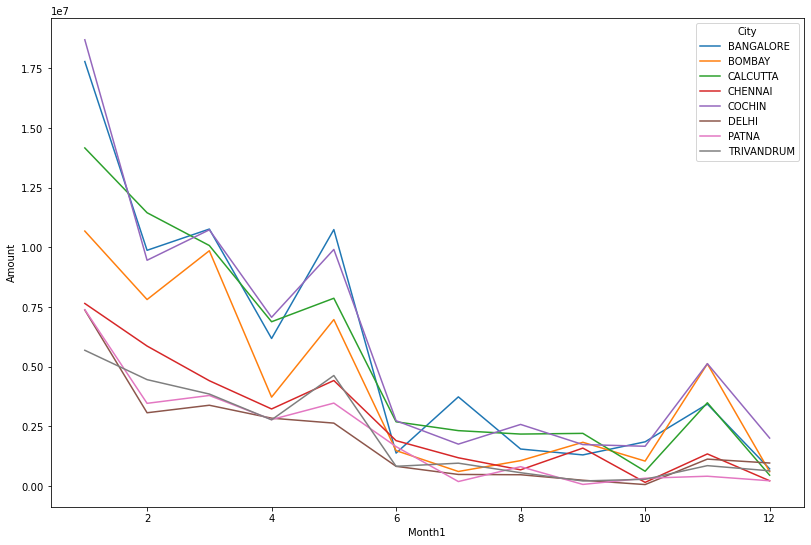

In [15]:
comp=pd.pivot_table(data=credit_spend,values='Amount',index='Month1',columns='City',aggfunc='sum')
comp.plot(kind='line',figsize=[13.5,9],ylabel='Amount')
plt.show()

## b. Comparison of yearly spend on air tickets

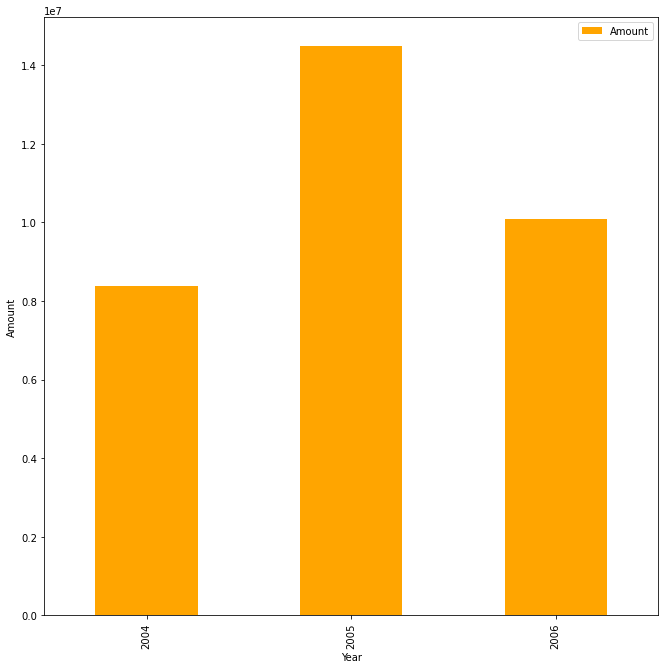

In [16]:
Spend['Year']=Spend.Month.dt.year
Spend=Spend[Spend.Type=='AIR TICKET']
Spend1=Spend.groupby(by='Year')[['Amount']].sum()
Spend1.plot(kind='bar',figsize=[11,11],ylabel='Amount',color='Orange')
plt.show()

# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

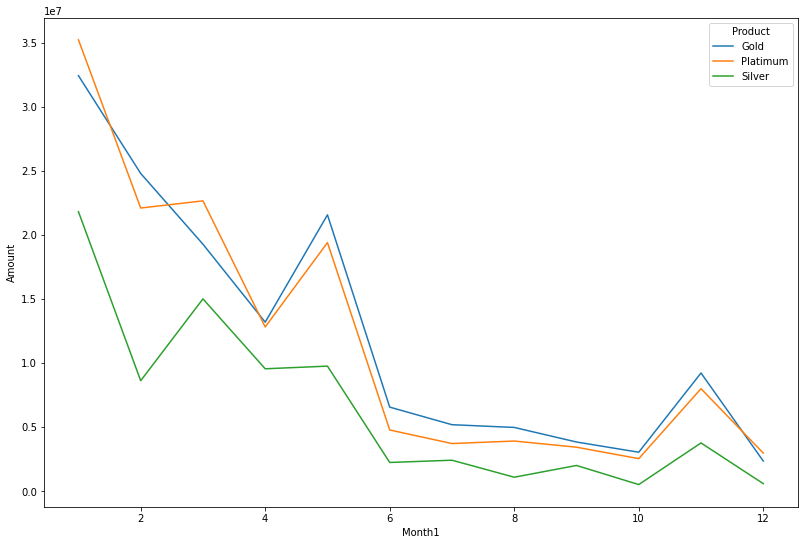

In [17]:
group=pd.pivot_table(data=credit_spend,values='Amount',index='Month1',columns='Product',aggfunc='sum')
group.plot(kind='line',figsize=[13.5,9],ylabel='Amount')
plt.show()

## 5. Write user defined PYTHON function to perform the following analysis:
## You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.
AnalytixLabs, Website:

In [33]:
repay_credit=pd.merge(how='inner',left=Repay,right=Credit_data,on='Customer')
repay_credit['Year']=repay_credit.Month.dt.year
time_period=int(input('Enter the year:'))
prod_cat=input('Enter the product:')
city_name=input('Enter the city:')
new=repay_credit.loc[(repay_credit.Product == prod_cat)& (repay_credit.Year==time_period)&(repay_credit.City==city_name) ]
def top10Customers(prod_cat,time_period):
    #return pd.pivot_table(data=new,values='Amount',index=['Year','Product','City','Customer'],aggfunc='sum').sort_values(by='Amount',ascending=False).head(10)
    return new.groupby(by=['Year','Product','City','Customer'])[['Amount']].sum().sort_values(by='Amount',ascending=False).head(10)
top10Customers(prod_cat,time_period)

Enter the year:2004
Enter the product:Gold
Enter the city:DELHI


Amount
Year Product City  Customer            
2004 Gold    DELHI A44       2149383.50
                   A93        342326.14